In [1]:
import numpy as np
import pandas as pd
import random
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils, datasets, layers, models, callbacks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization
from sklearn.metrics import classification_report
import zipfile

In [2]:
# Define paths and extract zip file
zip_path = r"C:\\Users\\Admin\\3D Objects\\PROJECT DISTRACTED DRIVER\\Distracted driver ipynb\\imgs.zip"
extract_path = r"C:\\Users\\Admin\\3D Objects\\PROJECT DISTRACTED DRIVER\\Distracted driver extracted"

In [3]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [4]:
# Set directory path for test and train
directory = os.path.join(extract_path, "train")
test_directory = os.path.join(extract_path, "test")
classes = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

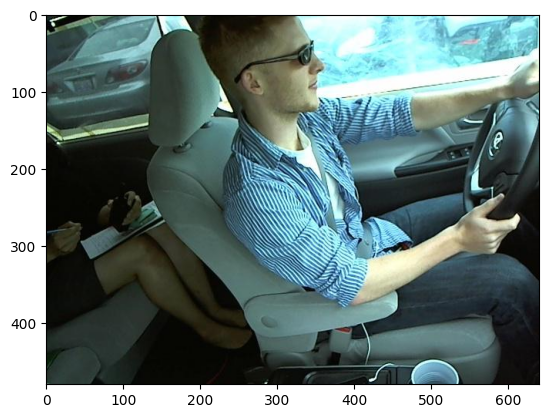

(480, 640, 3)


In [5]:
# Image size
img_size = 240

# Display a sample image of input
for i in classes:
    path = os.path.join(directory, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
        RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(RGB_img)
        plt.show()
        break
    break

print(img_array.shape)

(240, 240, 3)


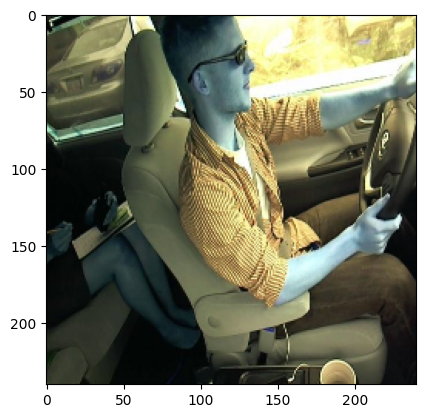

In [6]:
# Resize test image if any image is not 240*240
new_img = cv2.resize(img_array, (img_size, img_size))
print(new_img.shape)
plt.imshow(new_img)
plt.show()

In [7]:
# Create training data
def create_training_data():
    training_data = []
    for category in classes:
        path = os.path.join(directory, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
            RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            new_img = cv2.resize(RGB_img, (img_size, img_size))
            training_data.append([new_img, class_num])
    return training_data

training_data = create_training_data()
print(len(training_data))

random.shuffle(training_data)

22424


In [8]:
# Prepare features and labels
x = []
y = []
for features, label in training_data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 3)
y = np.array(y)

In [9]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=96)

In [10]:
# One-hot encoding labels
Y_train = utils.to_categorical(y_train, num_classes=10)
Y_test = utils.to_categorical(y_test, num_classes=10)

In [11]:
# Build the CNN model
model = models.Sequential()

# CNN Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.3))

# CNN Layer 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.3))

# CNN Layer 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.5))

# Dense Layers
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Train the model
callback = [callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]
batch_size = 70
n_epochs = 6

In [13]:

results = model.fit(x_train, Y_train, 
                    batch_size=batch_size, epochs=n_epochs, 
                    verbose=1, 
                    validation_data=(x_test, Y_test), 
                    callbacks=callback)

Epoch 1/6
225/225 ━━━━━━━━━━━━━━━━━━━━ 1150s 5s/step - accuracy: 0.5262 - loss: 1.5892 - val_accuracy: 0.9570 - val_loss: 0.1507
Epoch 2/6
225/225 ━━━━━━━━━━━━━━━━━━━━ 1136s 5s/step - accuracy: 0.9556 - loss: 0.1548 - val_accuracy: 0.9545 - val_loss: 0.1504
Epoch 3/6
225/225 ━━━━━━━━━━━━━━━━━━━━ 1135s 5s/step - accuracy: 0.9761 - loss: 0.0814 - val_accuracy: 0.9878 - val_loss: 0.0493
Epoch 4/6
225/225 ━━━━━━━━━━━━━━━━━━━━ 1129s 5s/step - accuracy: 0.9821 - loss: 0.0548 - val_accuracy: 0.9860 - val_loss: 0.0489
Epoch 5/6
225/225 ━━━━━━━━━━━━━━━━━━━━ 1126s 5s/step - accuracy: 0.9842 - loss: 0.0506 - val_accuracy: 0.9782 - val_loss: 0.0773
Epoch 6/6
225/225 ━━━━━━━━━━━━━━━━━━━━ 1126s 5s/step - accuracy: 0.9882 - loss: 0.0346 - val_accuracy: 0.9926 - val_loss: 0.0284


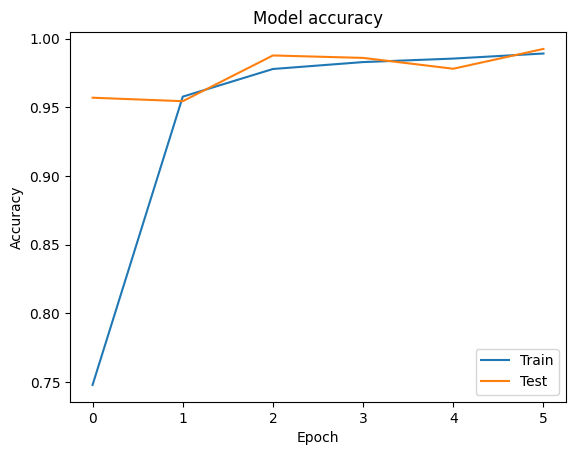

In [14]:
# Plot accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

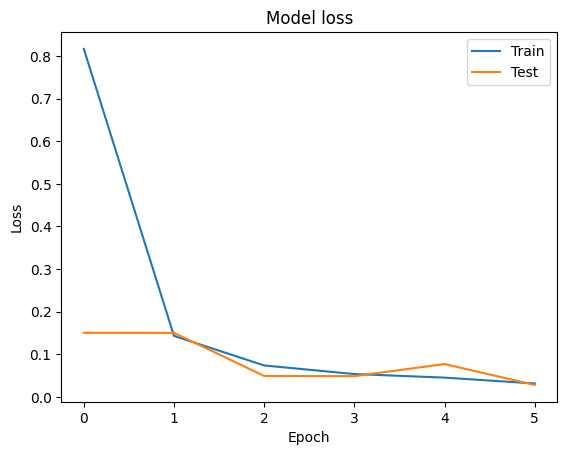

In [15]:
# Plot loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

211/211 ━━━━━━━━━━━━━━━━━━━━ 68s 324ms/step


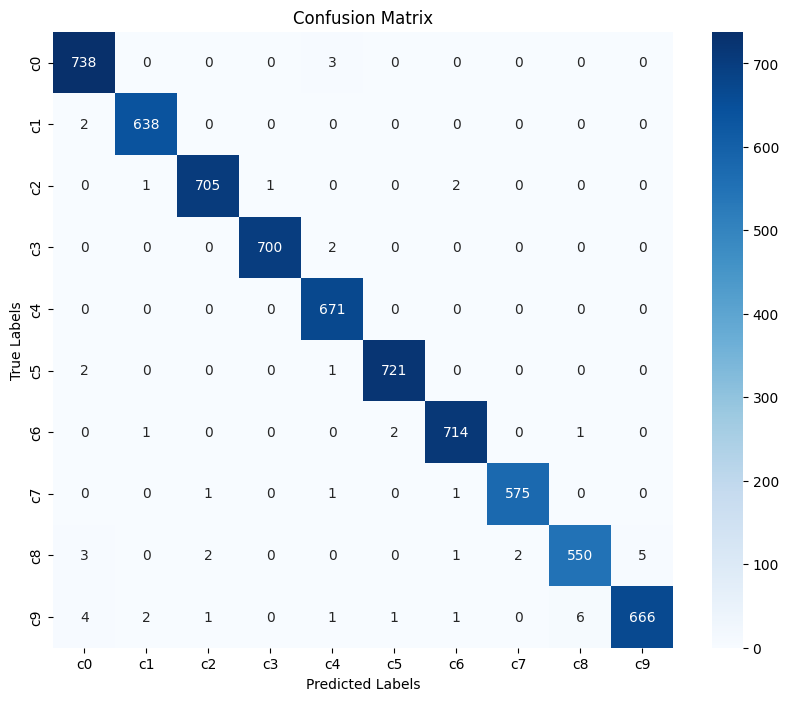

In [19]:
pred = np.argmax(model.predict(x_test), axis=-1)
conf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [20]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       741
           1       0.99      1.00      1.00       640
           2       0.99      0.99      0.99       709
           3       1.00      1.00      1.00       702
           4       0.99      1.00      0.99       671
           5       1.00      1.00      1.00       724
           6       0.99      0.99      0.99       718
           7       1.00      0.99      1.00       578
           8       0.99      0.98      0.98       563
           9       0.99      0.98      0.98       682

    accuracy                           0.99      6728
   macro avg       0.99      0.99      0.99      6728
weighted avg       0.99      0.99      0.99      6728



In [27]:
class_descriptions = {
    "c0": "safe driving",
    "c1": "texting - right",
    "c2": "talking on the phone - right",
    "c3": "texting - left",
    "c4": "talking on the phone - left",
    "c5": "operating the radio",
    "c6": "drinking",
    "c7": "reaching behind",
    "c8": "hair and makeup",
    "c9": "talking to passenger"
}

In [28]:
# Random prediction
random_filename = random.choice([x for x in os.listdir(test_directory)])
random_filepath = os.path.join(test_directory, random_filename)
img_array = cv2.imread(random_filepath, cv2.IMREAD_COLOR)
RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
new_img = cv2.resize(RGB_img, (img_size, img_size))

In [29]:
# Predict the class
predicted_class = np.argmax(model.predict(new_img.reshape(-1, img_size, img_size, 3)))
predicted_label = classes[predicted_class]
predicted_description = class_descriptions[predicted_label]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [30]:
# Print the prediction details
print(f'Prediction: {predicted_label} - {predicted_description}')

Prediction: c6 - drinking


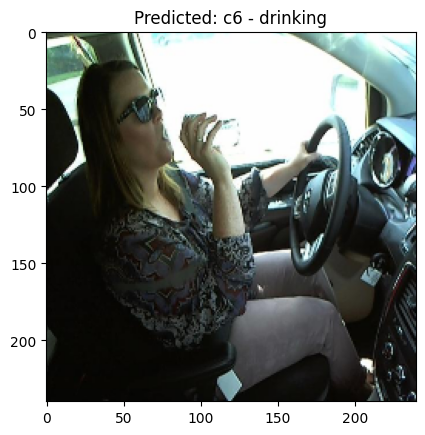

In [31]:
plt.imshow(new_img)
plt.title(f'Predicted: {predicted_label} - {predicted_description}')
plt.show()

In [32]:
# Save model
model.save_weights('./driverdistraction_lr.weights.h5', overwrite=True)
model.save('./driverdistraction.h5')